---COMO FUNCIONA UM PROJETO DE CIÊNCIA DE DADOS---

#  1.Entendimento do Desafio que você quer resolver
#  2.Entendimento da Empresa/Área
#  3.Ajustes de Dados (Limpeza de Dados)
#  4.Análise Exploratória
#  5.Modelagem + Algoritmos
#  6.Interpretação dos Resultados
#  7.Deploy/Prod


1.Contexto
2.O Objetivo da análise
3.Oque temos disponível, inspirações e créditos
4.Expectativas iniciais

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
meses = {'jan': 1,'fev': 2,'mar': 3,'abr': 4,'mai': 5,'jun': 6,'jul': 7,'ago': 8,'set': 9,'out': 10,'nov': 11,'dez': 12}

caminho_bases = pathlib.Path('dataset')

base_airbnb = []

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]

    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))

    df = pd.read_csv(caminho_bases / arquivo.name)
    df ['ano'] = ano
    df ['mes'] = mes

    base_airbnb.append(df)

base_airbnb = pd.concat(base_airbnb)
display(base_airbnb)

<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
<ipython-input-2-16e4ce70ab27>:14: DtypeWarning: Colum

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

- Como há várias colunas, o modelo pode ficar muito lento.
- Além disso uma análise rapida permite ver que várias colunas não são necessárias para o modelo.
- Colunas que irão ser excluídas
    - IDs, Links e informações não relevantes para o modelo 
    - Colunas repetidas ou extremamente parecidas com outra
    - Colunas preenchidas com texto livre -> Não vai rodar nenhuma análise de palavras ou algo do tipo 
    - Colunas em que todos os quais todos os valores são iguais
    -
    -
    -
- Para isso, vamos criar um arquivo em excel com os 1.000 primeiros registros em excel

In [3]:
# Celula para baixar os primeiros 1000 registros em uma planilha excel
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [4]:
# Verificar se uma coluna tem varios valores que são iguais ou não
print(base_airbnb['experiences_offered'].value_counts())

experiences_offered
none    902210
Name: count, dtype: int64


In [5]:
# Comparar uma coluna com a outra
print((base_airbnb['host_listings_count']==base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
Name: count, dtype: int64


In [6]:
# Verificar se a coluna tem muitas celulas vazias
print(base_airbnb['square_feet'].isnull().sum())

888162


In [7]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

### Tratar valores que estão faltando

-Visualizando os dados, foi percebido que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluidas da análise
-Para as outras colunas, como temos muitos dados (mais de 900.00 linhas) vamos excluir as linhas que contém dados NaN

In [8]:
for coluna in base_airbnb:
    if (base_airbnb[coluna].isnull().sum()) > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [9]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


In [10]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

In [11]:
#price
#extra people

# Price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
# extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

-Olhar feature por feature para
    -Ver a correlação entre a sfeatures e decidir se manteremos todas as features que temos
    -Excluir outliers(usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 - 1.5xAmplitude) Amplitude = Q3 - Q1
    -Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar ae se devemos excluir

-Começar pelas colunas de preço (resultado final que queremos) e de extra_people(também valor monetário). Esses são os valores numéricos continuos
-Depois analisar as colunas de valores numéricos discretos (accomodates, bedrroms, guests_included, etc)
-E por fim avaliar as colunas de texto e definir quais categorias fazem sentido manter ou não 

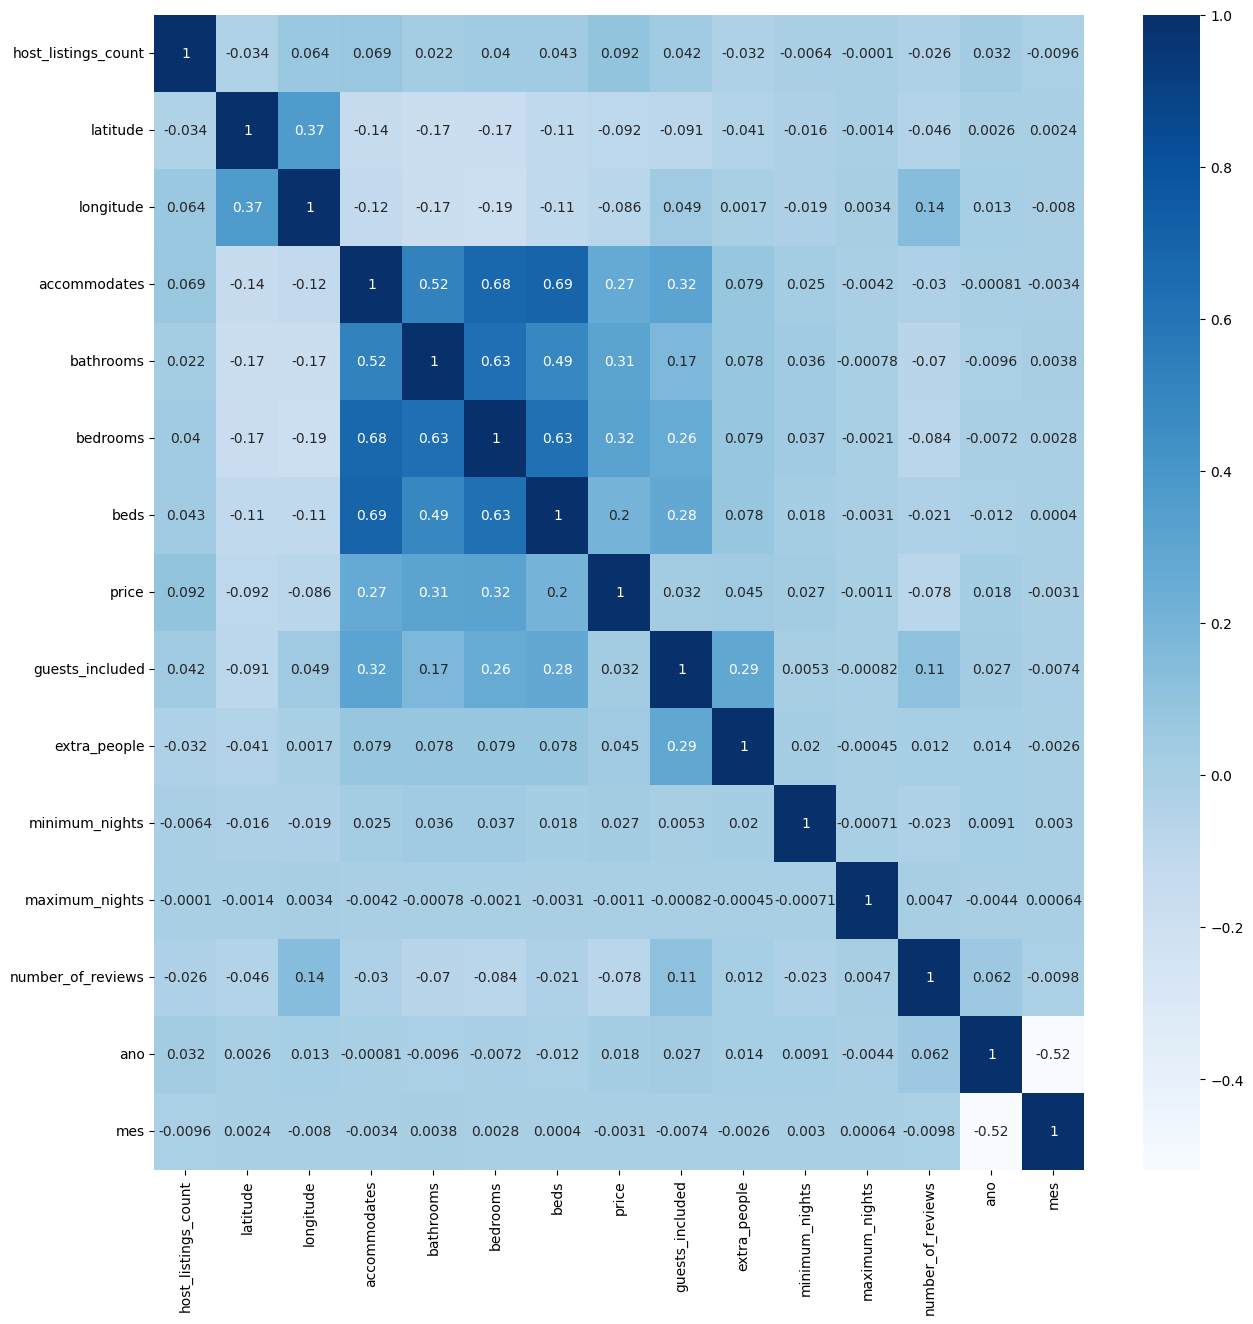

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(base_airbnb.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

### Difinição de Funções para análise de Outliers

Difinir algumas funções para ajudar na análise de outliers das colunas


In [13]:
def limite(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    amplitude = Q3 - Q1
    return Q1 - 1.5 * amplitude, Q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limite(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas =  qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [14]:
print(limite(base_airbnb['price']))

(-524.0, 1276.0)


In [15]:
def diagram_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limite(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index , y=coluna.value_counts())
    ax.set_xlim(limite(coluna))

### Price
    

<ipython-input-15-d61d3593b0fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


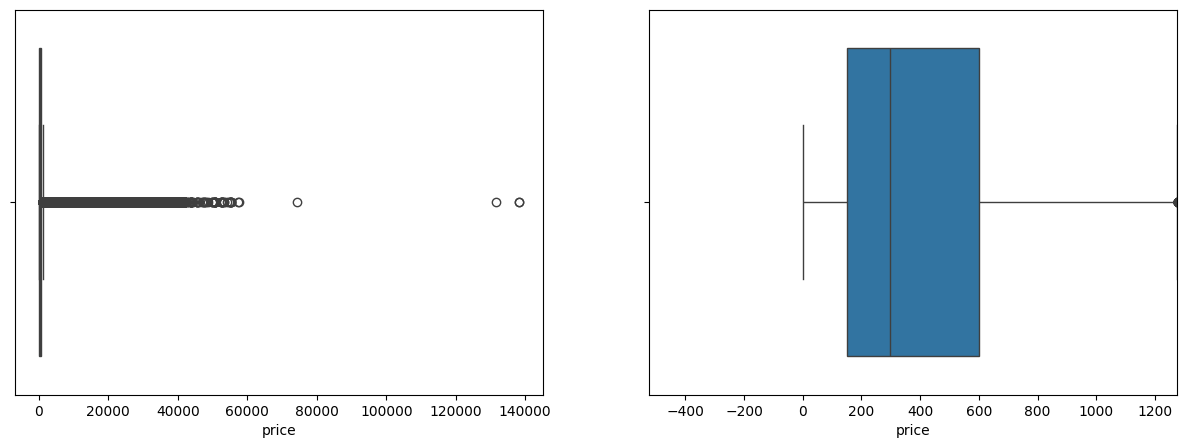

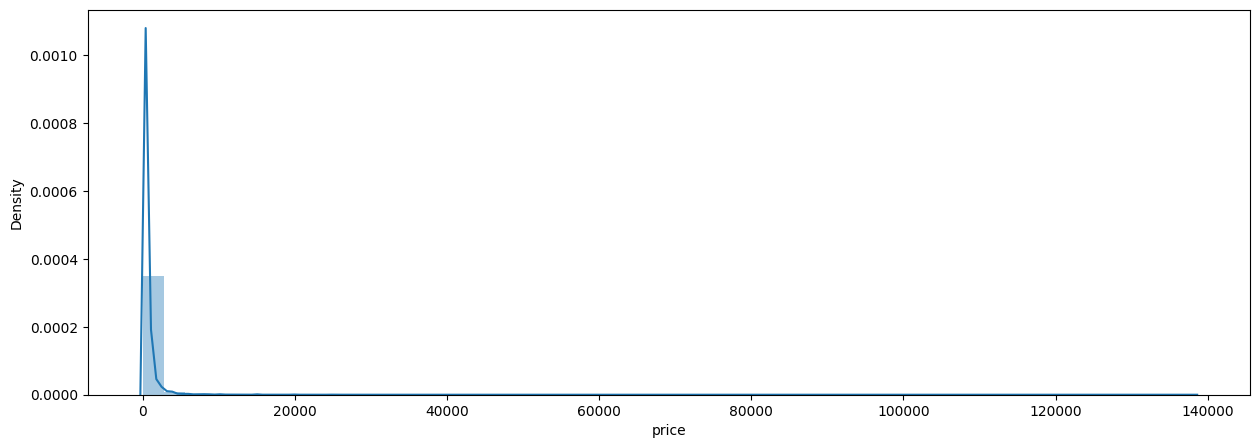

In [16]:
diagram_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como está sendo construido um modelo para imóveis comuns, valores acima do limite superior serão apenas de apartamentos de altissimo luxo, que não é o objetivo principal. Por isso, pode ser excluir esses outliers


In [17]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


<ipython-input-15-d61d3593b0fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


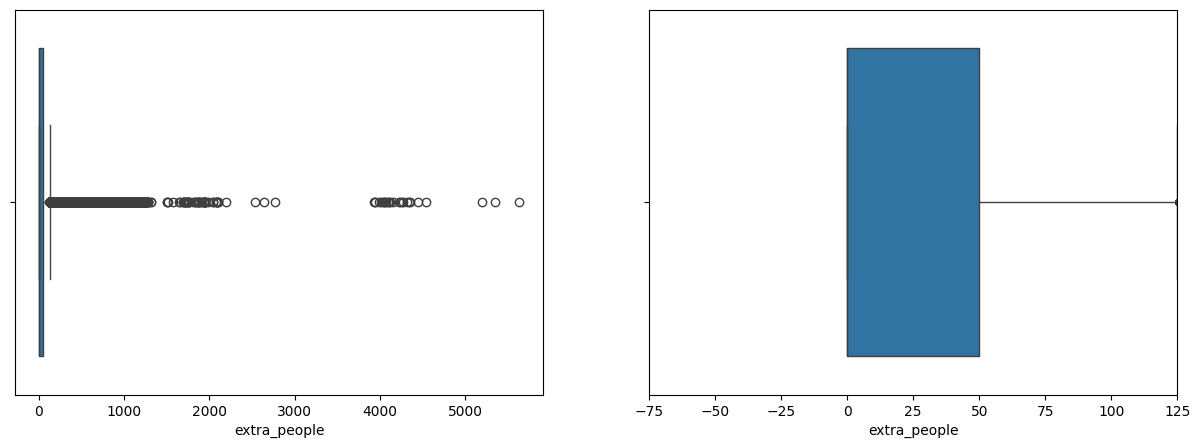

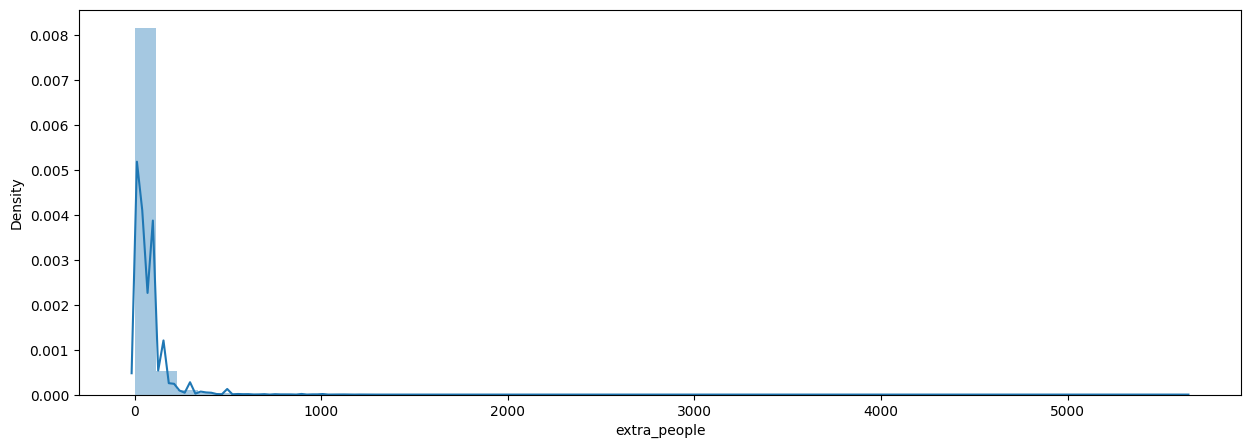

In [18]:
diagram_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

### Extra People


In [19]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


<ipython-input-15-d61d3593b0fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


(751233, 23)


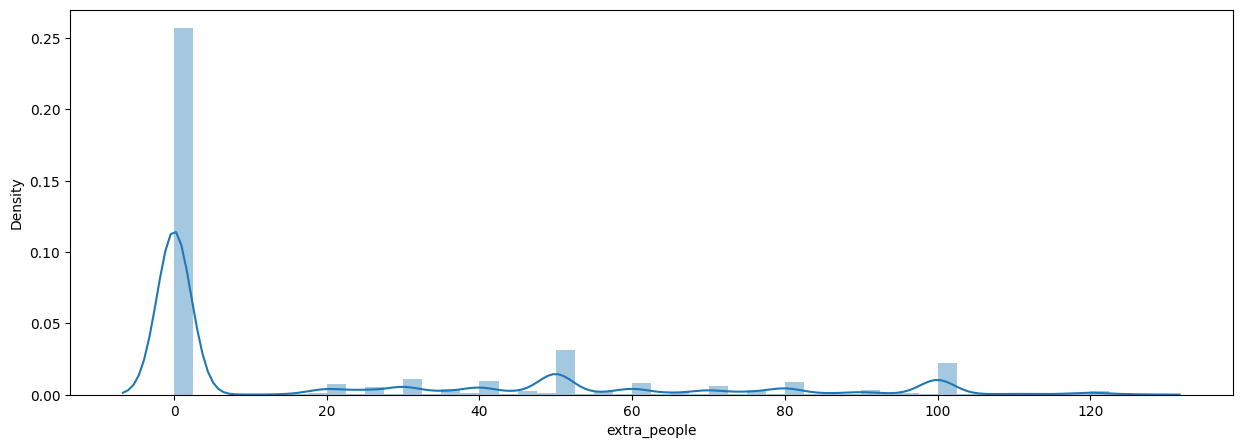

In [20]:
histograma(base_airbnb['extra_people'])
print(base_airbnb.shape)

### Host Listings Count

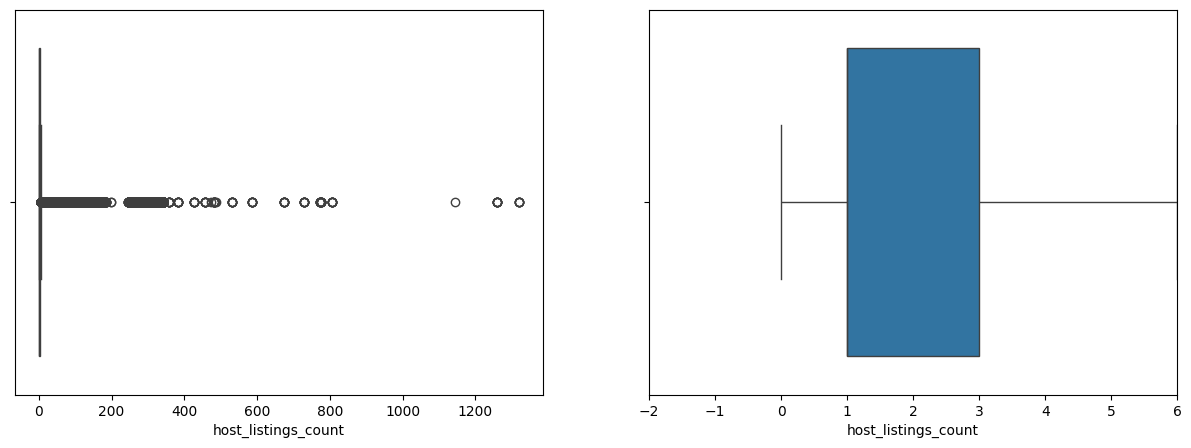

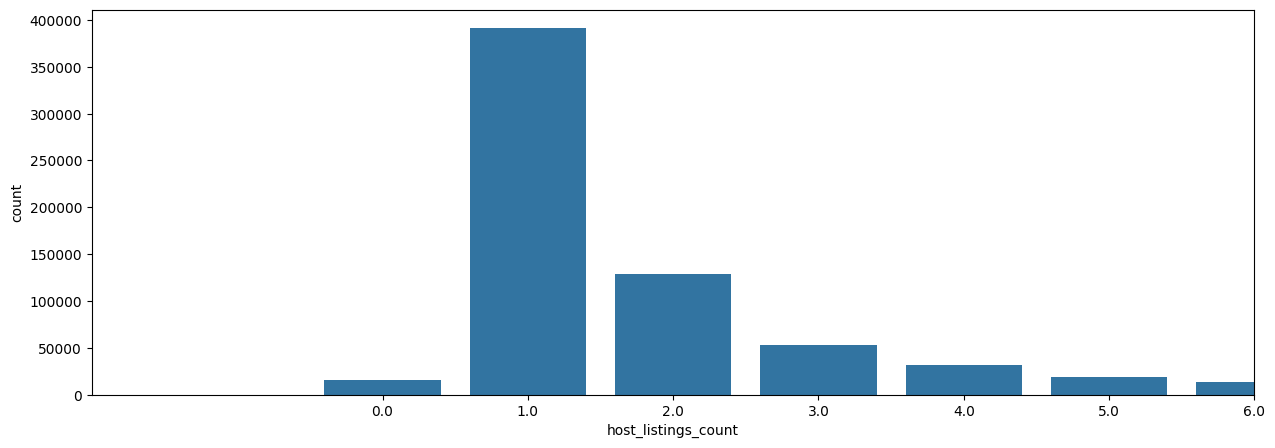

In [21]:
diagram_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Pode excluir os outliers, pois para o objetivo do projeto, hosts com mais de 6 imóveis no airbnb não é o publico alvo do objetivo do projeto(deve ser imobs ou profissionais que gerenciam imóveis no airbnb)

In [22]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))


97723 linhas removidas


### Accomodates


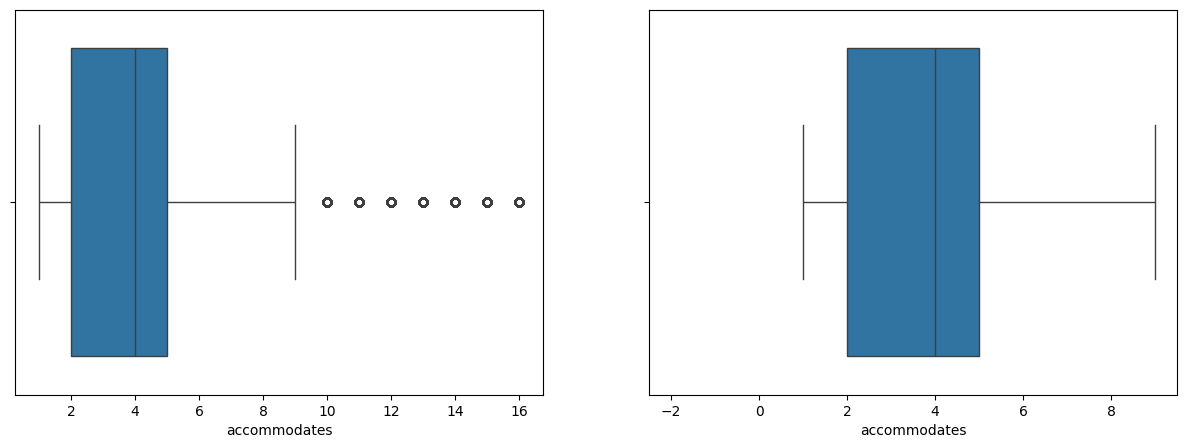

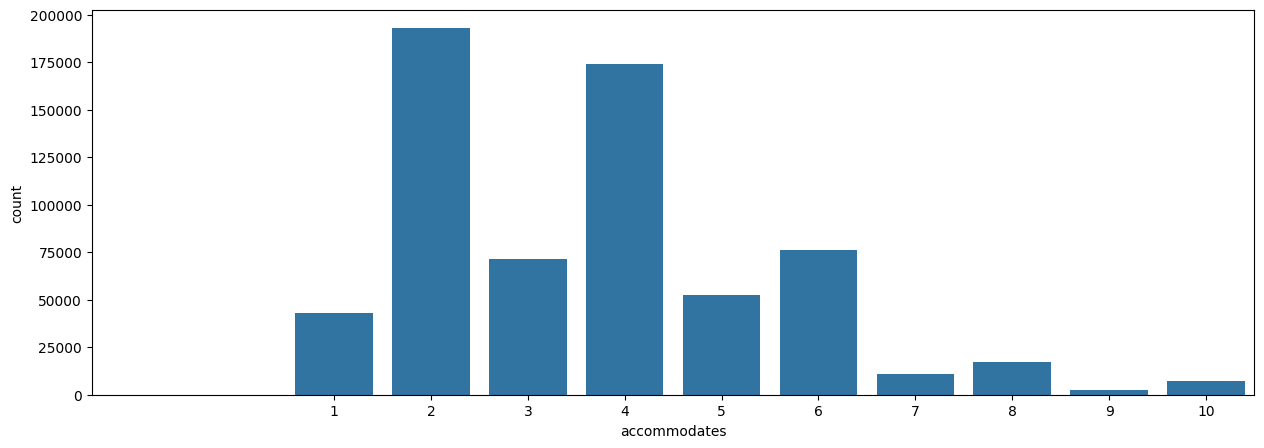

In [23]:
diagram_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [24]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))


13146 linhas removidas


### Bathrooms

<Axes: xlabel='bathrooms', ylabel='count'>

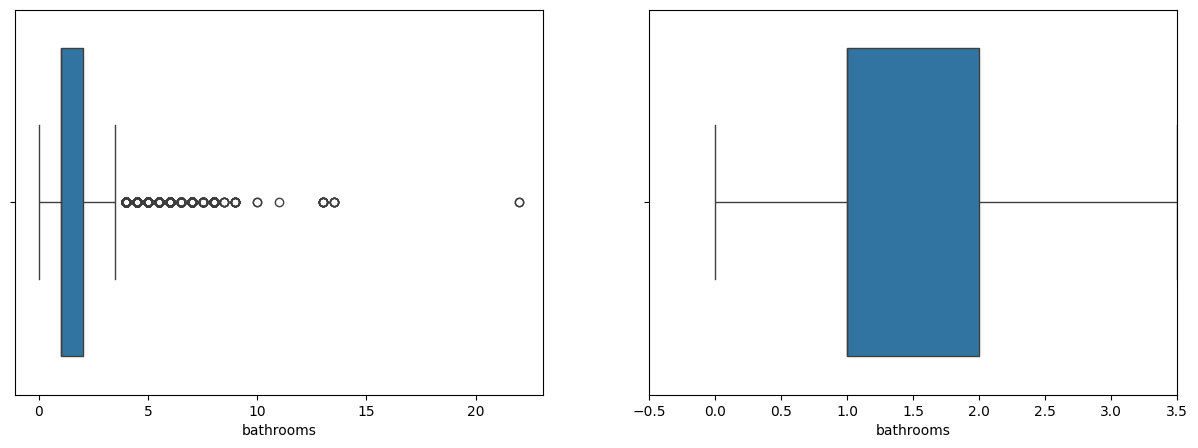

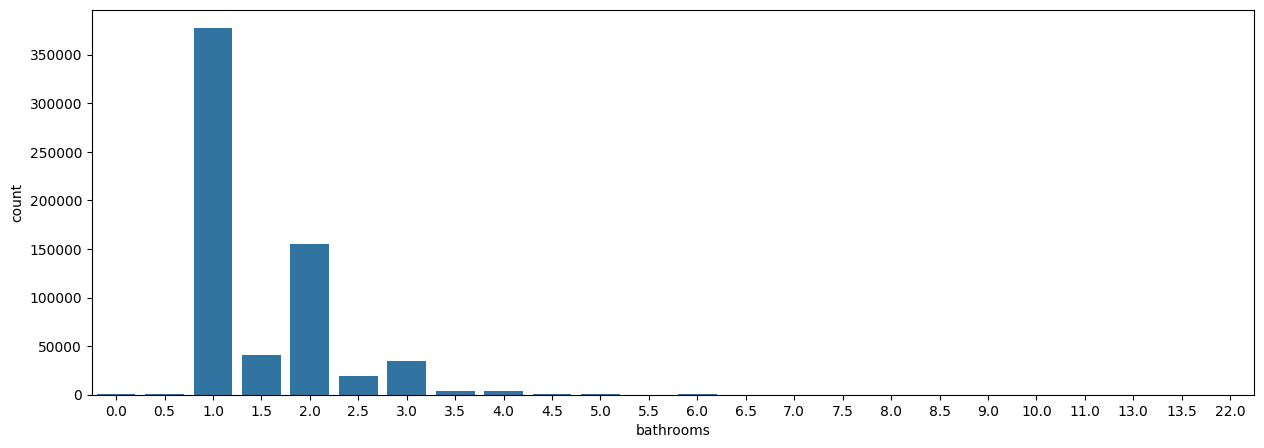

In [25]:
diagram_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())


In [26]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


### Beds

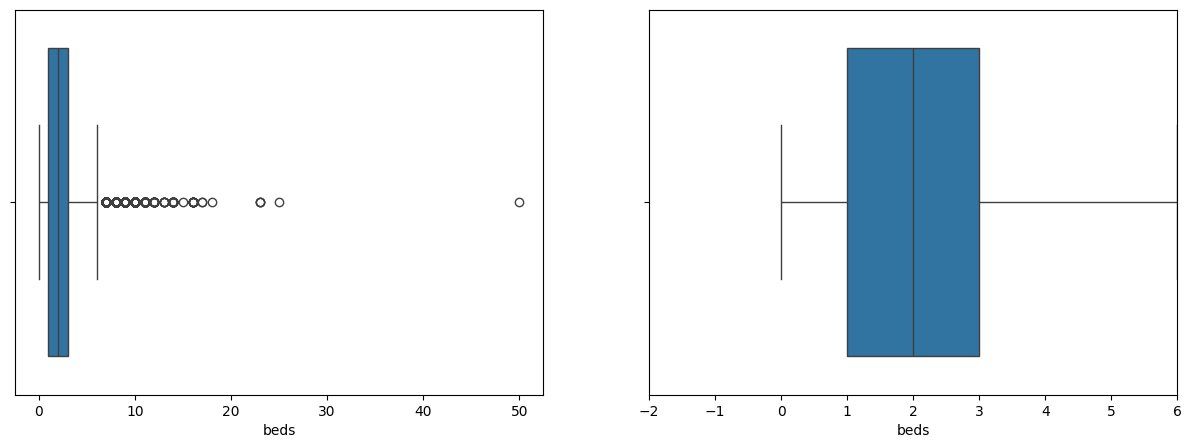

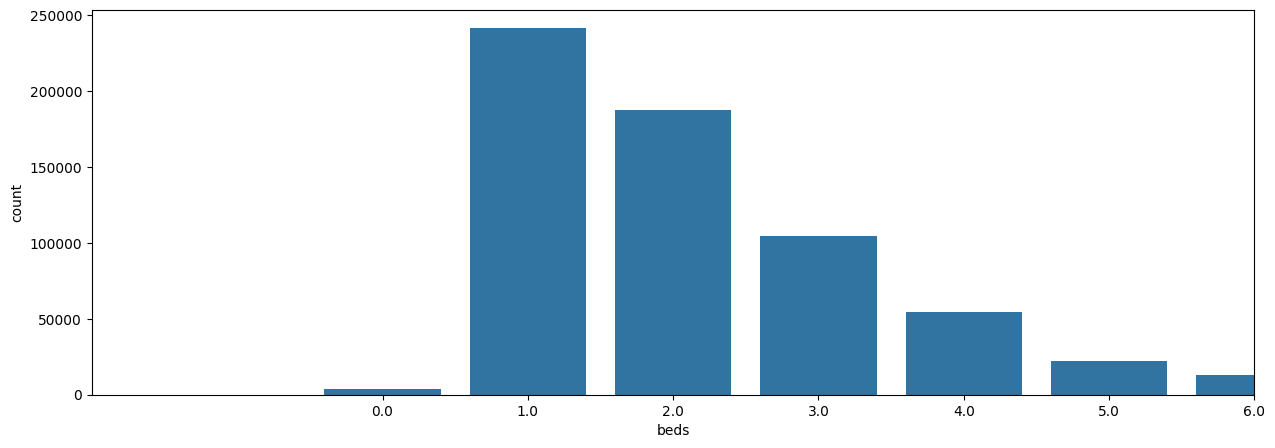

In [27]:
diagram_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [28]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

6460 linhas removidas


### Bedrooms

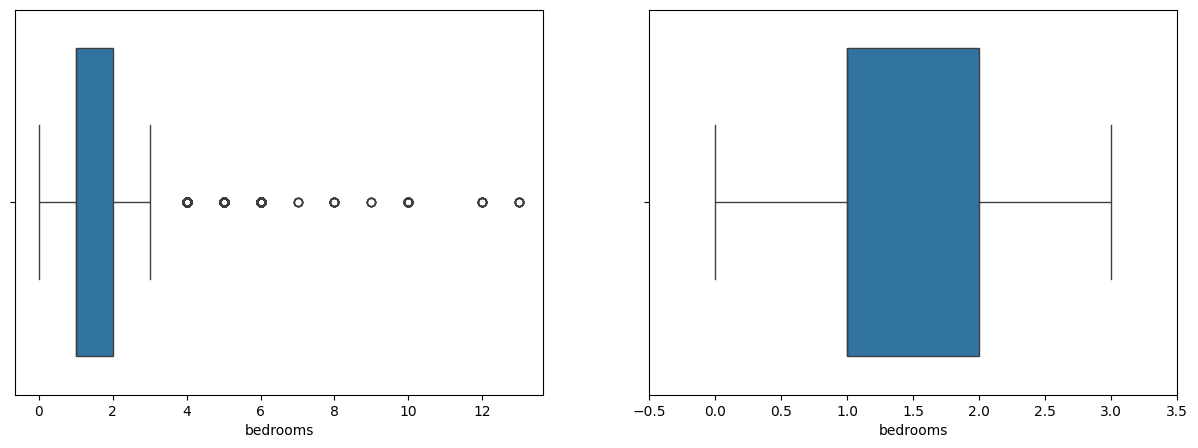

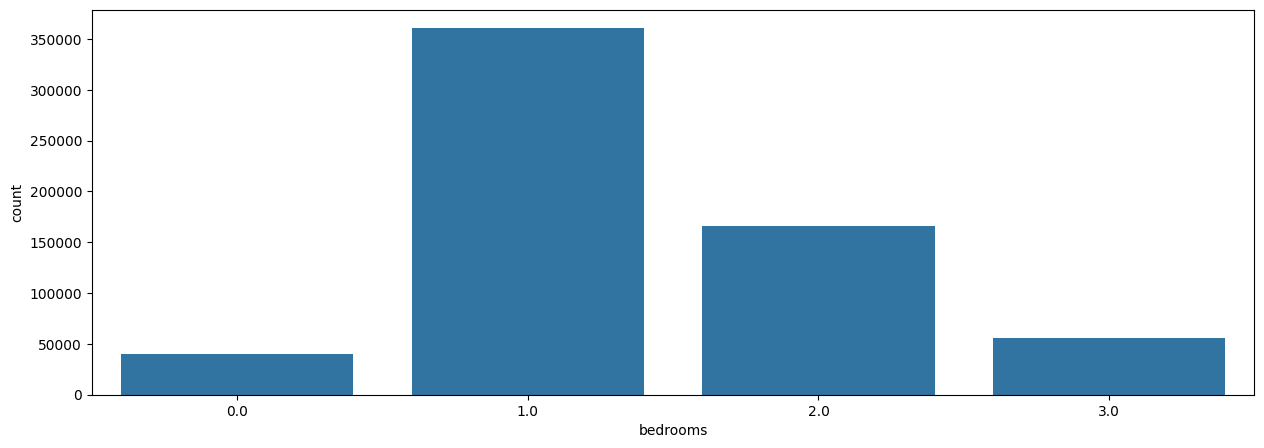

In [29]:
diagram_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [30]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

4644 linhas removidas


### guests_included

(1.0, 1.0)


<Axes: xlabel='guests_included', ylabel='count'>

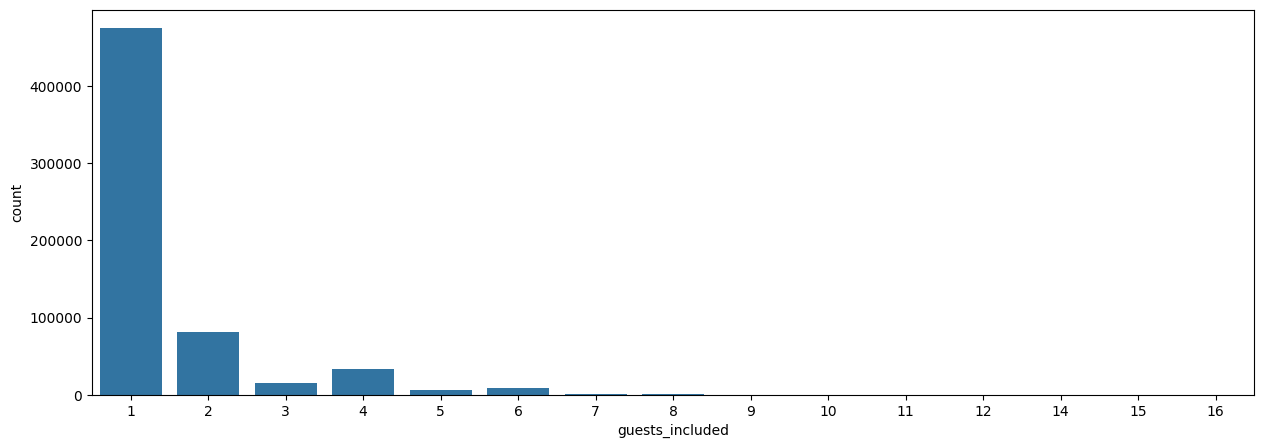

In [31]:
#diagram_caixa(base_airbnb['bedrooms'])
#grafico_barra(base_airbnb['bedrooms'])
print(limite(base_airbnb['guests_included']))
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

Vamos remover essa feature de análise. Pelo o que parece os usuário do airbnb usam muito o valor padrão como 1 guest_included. Isso pode levar o modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, é melhor excluir essa coluna.

In [32]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

### minimum_nights

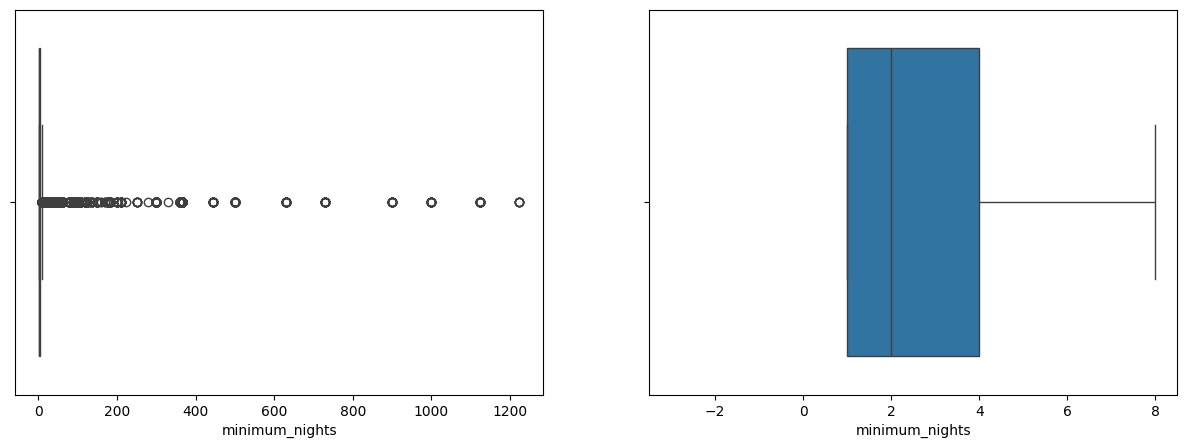

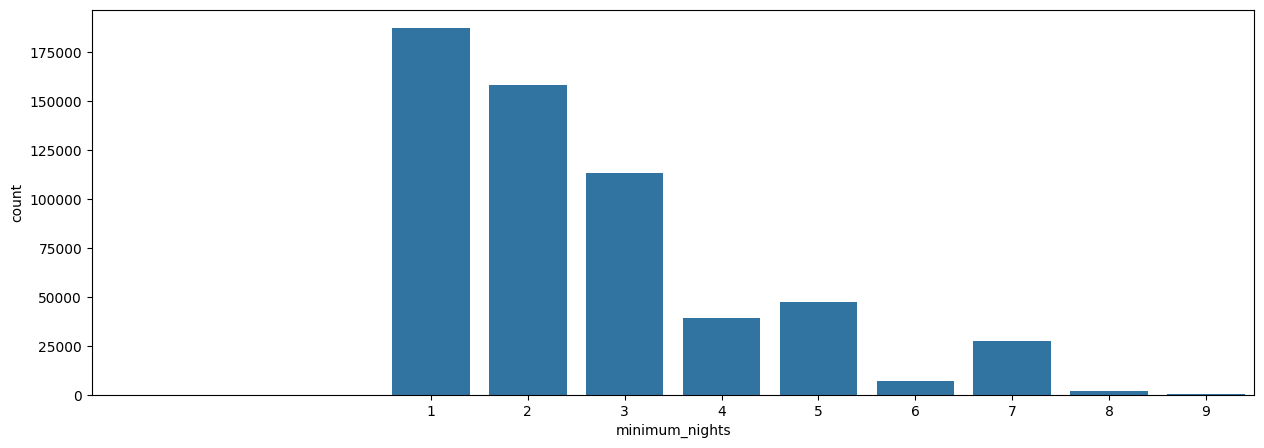

In [33]:
diagram_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [34]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


### maximum_nights

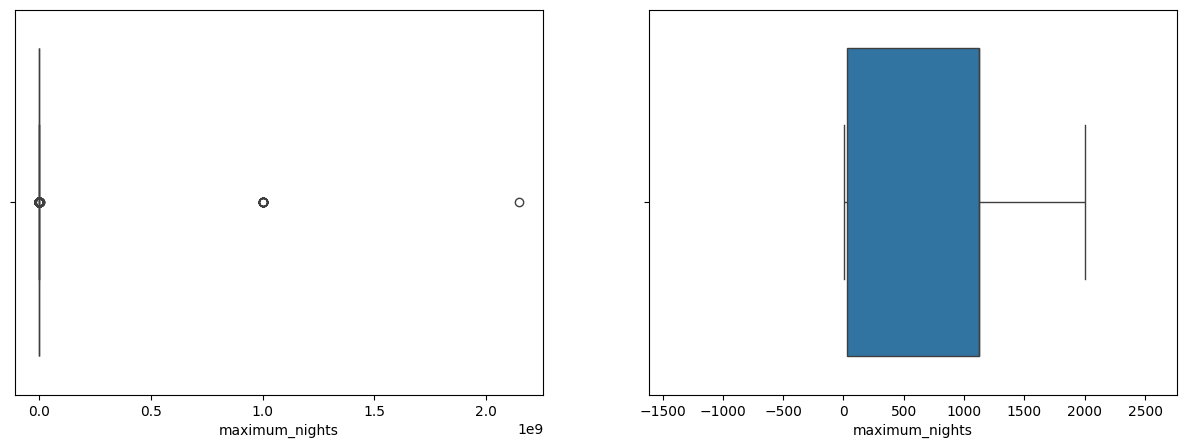

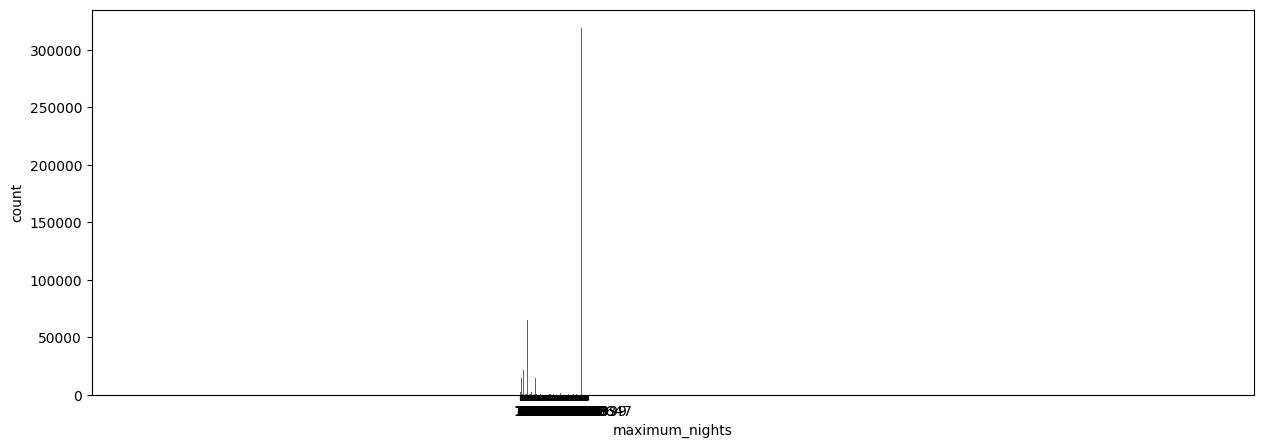

In [35]:
diagram_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [36]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

### number_of_reviews


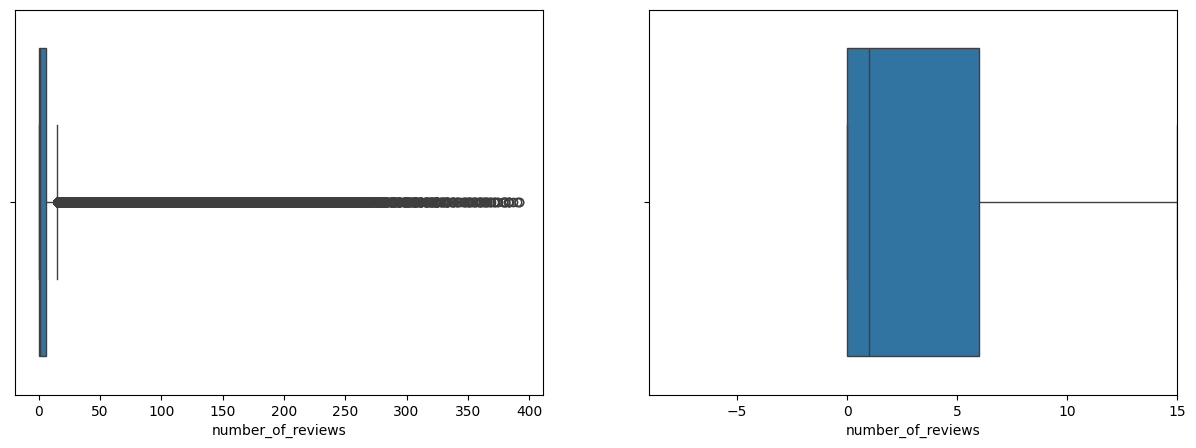

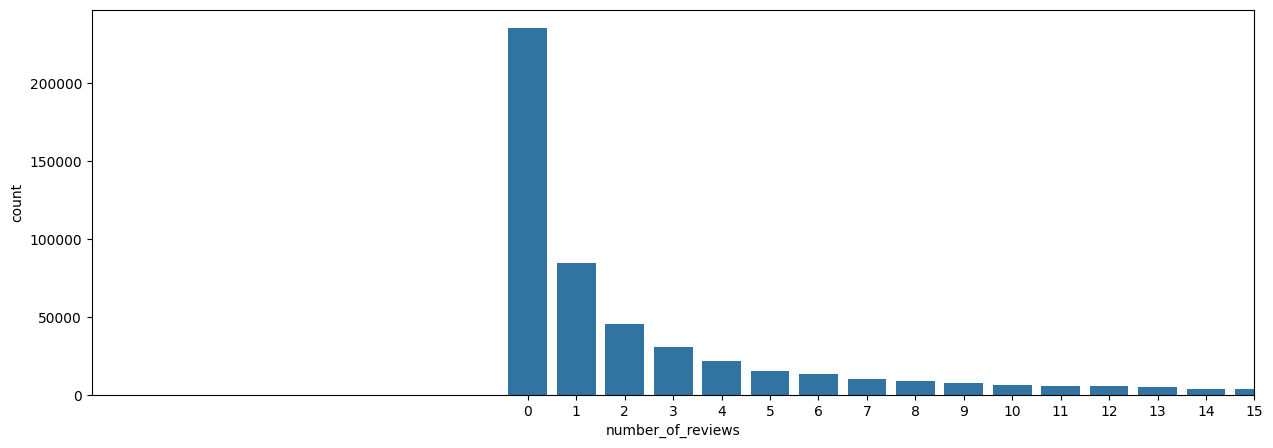

In [37]:
diagram_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [38]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

### Tratamento de colunas de valores de texto

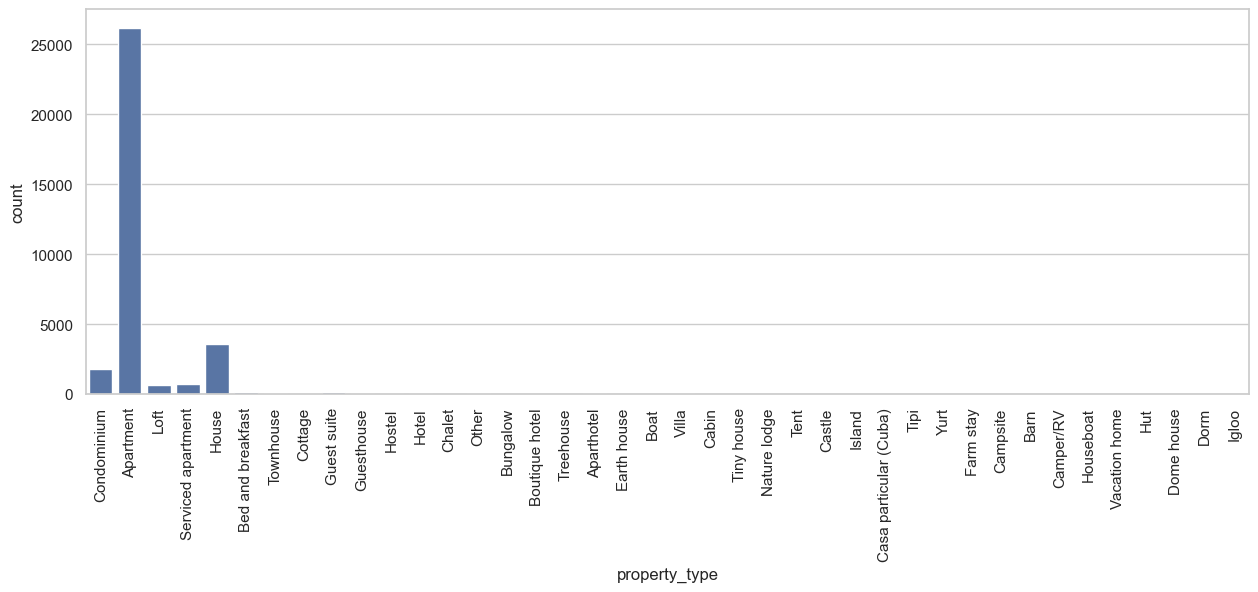

In [39]:
#print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
grafico = sns.countplot(x=df['property_type'])
grafico.tick_params(axis='x', rotation=90)

In [40]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = [] 

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type']= 'Outros'

print(base_airbnb['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


### room_type

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


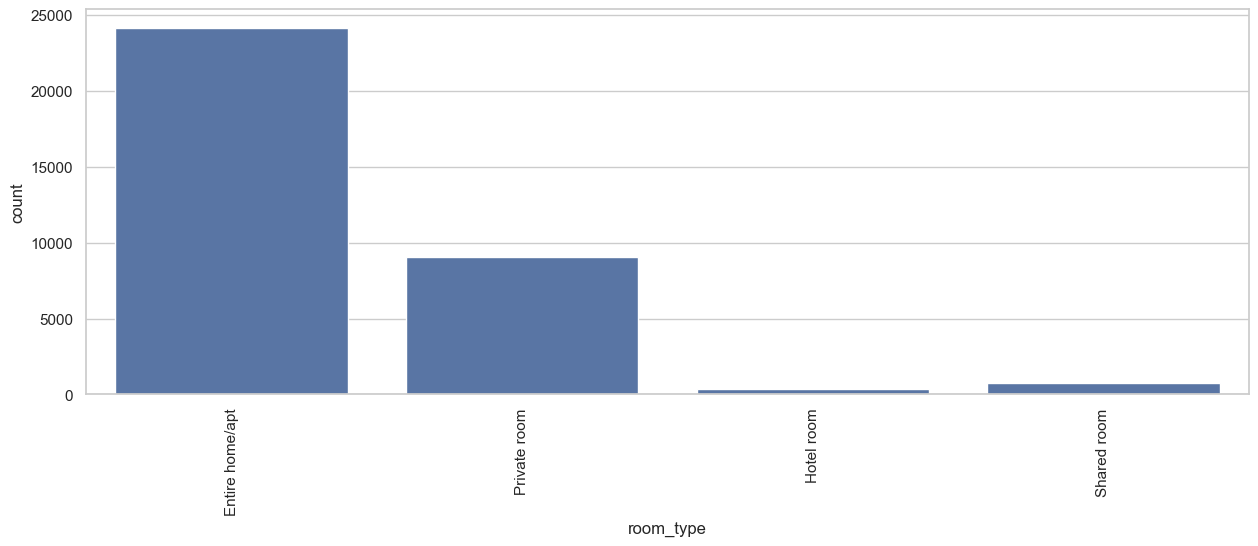

In [41]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
grafico = sns.countplot(x=df['room_type'])
grafico.tick_params(axis='x', rotation=90)

### bed_type

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


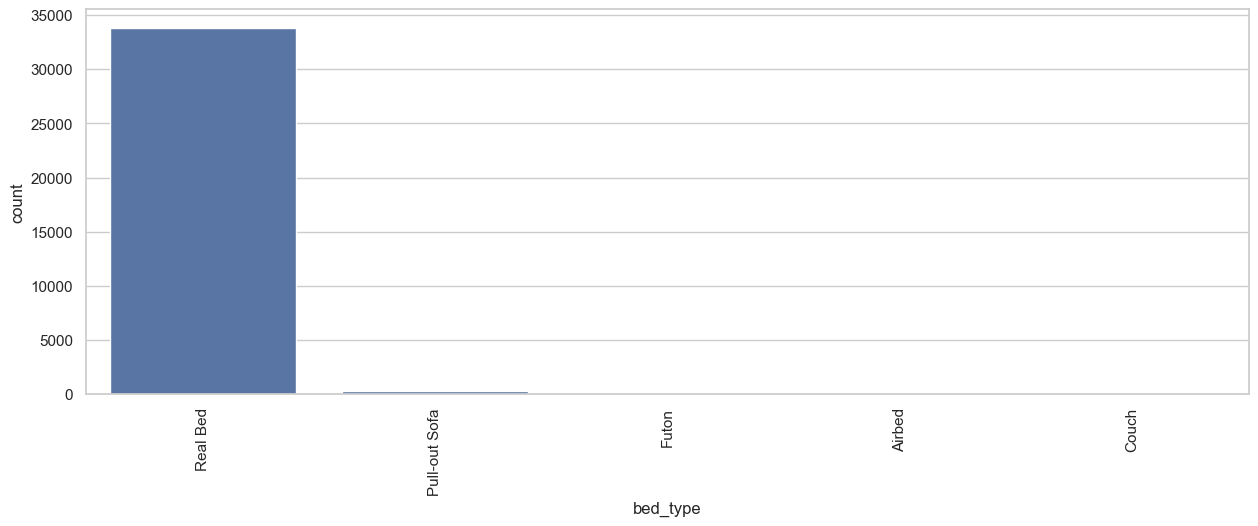

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    570643
Outros       11340
Name: count, dtype: int64


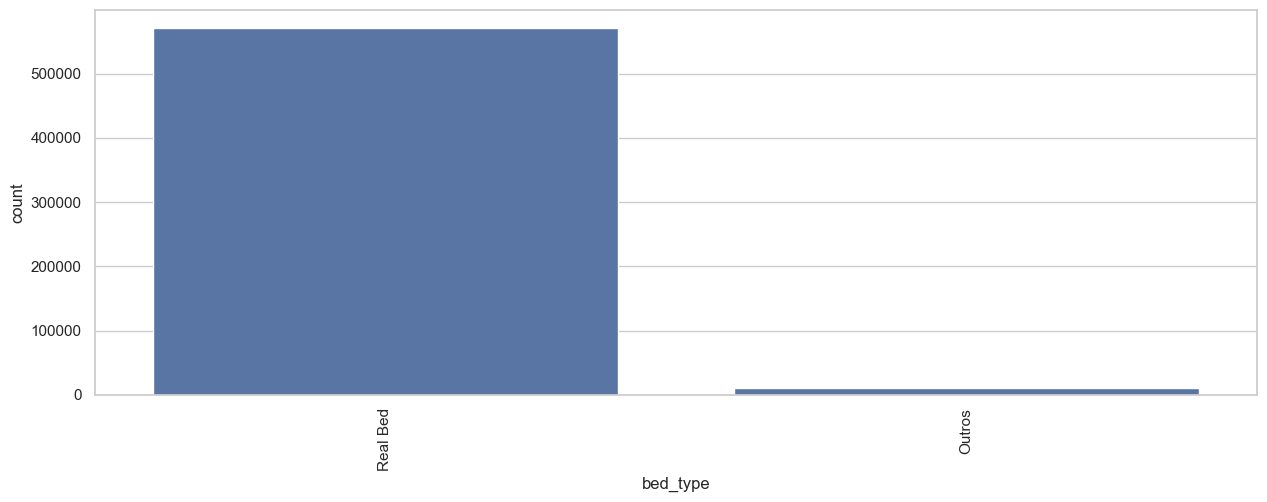

In [42]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=df['bed_type'])
grafico.tick_params(axis='x', rotation=90)
plt.show()

# Agrupando categorias o bed_type

tabela_beds = base_airbnb['bed_type'].value_counts()
colunas_agrupar = [] 

for tipo in tabela_beds.index:
    if tabela_beds[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type']= 'Outros'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
grafico = sns.countplot(x=base_airbnb['bed_type'])
grafico.tick_params(axis='x', rotation=90)
plt.show()

### cancellation_policy

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


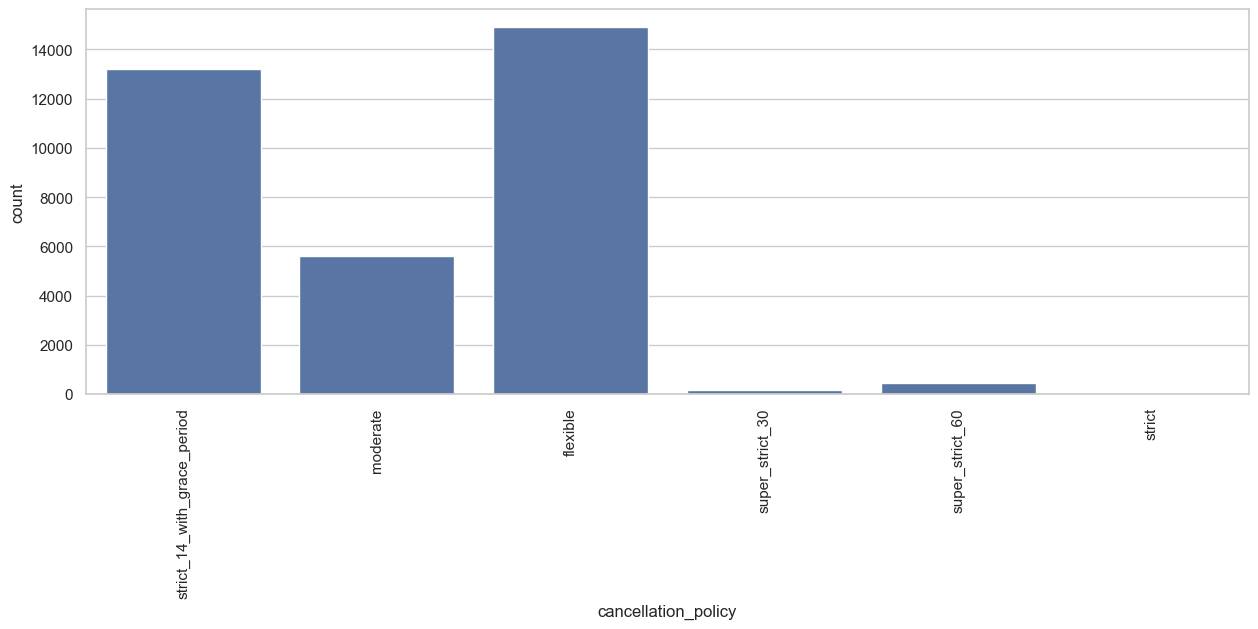

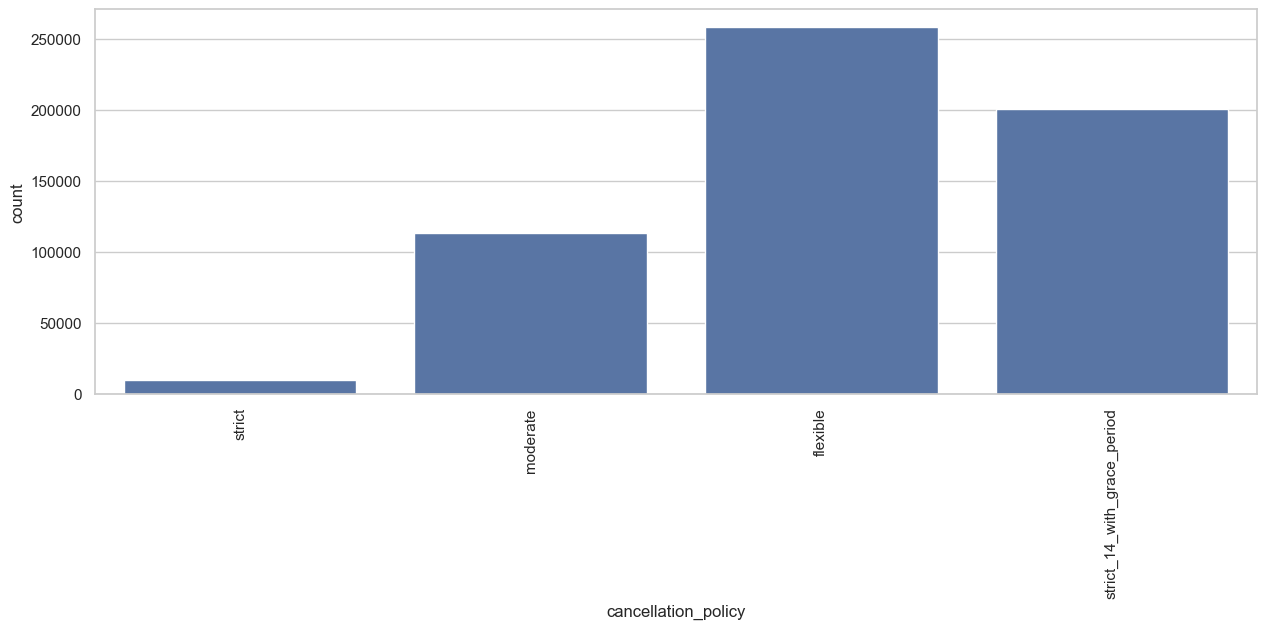

In [43]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
grafico = sns.countplot(x=df['cancellation_policy'])
grafico.tick_params(axis='x', rotation=90)
# Agrupando categorias o cancellation_policy

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = [] 

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy']= 'strict'

print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
grafico = sns.countplot(x=base_airbnb['cancellation_policy'])
grafico.tick_params(axis='x', rotation=90)

### amenities

Como temos uma diversidade muito grande de ameneties e, as vezes, as mesmas amenities podem ser escritas de forma diferente, irei avaliar a quantidade de amenities como o parâmetro para o nosso modelo

In [44]:
# Se a coluna existir, realize a operação
if 'amenities' in base_airbnb.columns:
    # Imprima a lista de amenidades da segunda linha
    print(base_airbnb['amenities'].iloc[1].split(','))
    
    # Crie a nova coluna 'n_amenities' contando o número de amenidades
    base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)
else:
    print("A coluna 'amenities' não existe no DataFrame.")

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']


In [45]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581983, 20)

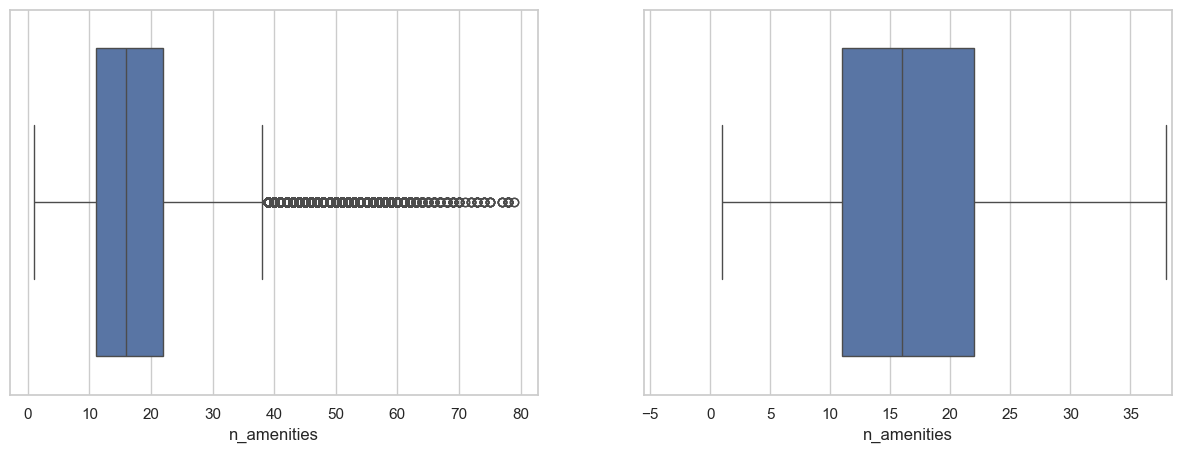

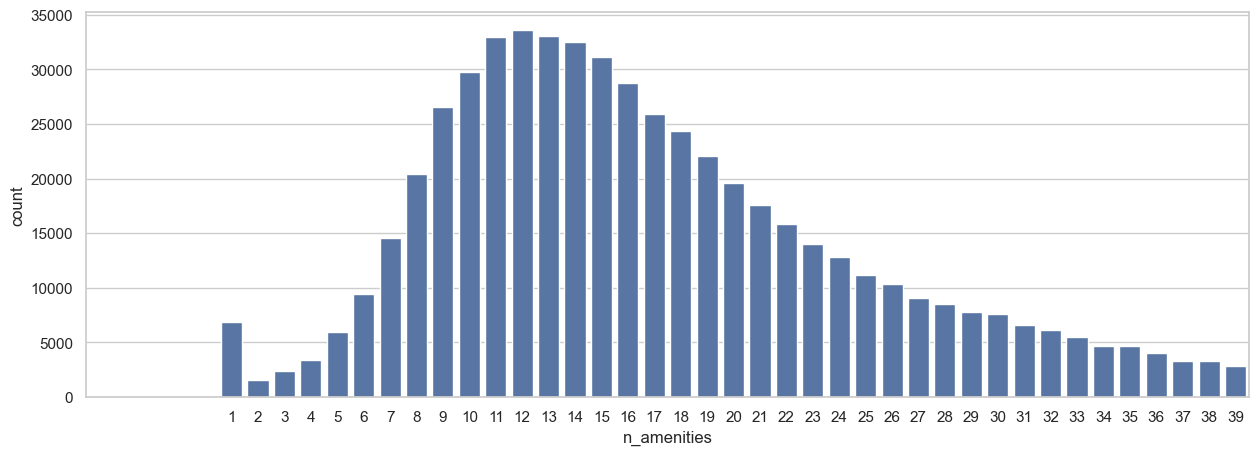

In [46]:
diagram_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [47]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

24343 linhas removidas


### Visualização de mapa das propriedades

In [48]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style="stamen-terrain")
mapa.show()

### Encoding

2. Ajustar as features para facilitar o trabalho do modelo futuro

-Features de valores T/F, substituir 

In [49]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 't', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 'f', coluna] = 0

In [50]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                       True                False                  False   
3                       True                False                  False   
4                       True                False                  False   
5                       True                False                  False   
6                       True                False                  False   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                  False            False               True   
3                  False            False               True   
4                  False            False               True   
5                  False            False               True   
6                  False            False               True   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                         False                         False   
3                         False                         False   
4                         False                         False   
5                         False                         False   
6                         False                         False   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                        True                                            False  
3                        True                                            False  
4                        True                                            False  
5                        True                                            False  
6                        True                                            False  

[5 rows x 36 columns]

### Criar e treinar um modelo de previsão

1. Definir se é classificação ou regressão
2. Escolher as métricas para avaliar o modelo
3. Escolher quais modeos vamos usar/testar
4. Treinar os modelos e testar
5. comparar os resultados dos modelos e escolher o vencedor
6. Analisar o melhor modelo mais a fundo
7. Fazer ajustes no melhor modelo

### Modelo de regressão

- Problemas de regressão
    - A regressão mais simples é y= a*x + b
    - Mas como vimos, podemos ter inúmeras variáveis


### R2
    - De 0 a 1 -> Quanto maior melhor
    - Explicação lúcida: Mede o quanto dos valores o modelo consegue explicar 
    - Ex: 92% significa que o modelo consegue explicar 92% da variância dos dados a partir da informação recebida

### RSME (Erro quadrático médio ou Raiz do Erro quadrático médio)
    - Pode ser qualquer valor
    - Mede o quanto o modelo erra
    

### Metricas de Avaliação |

In [51]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR2: {r2:.2%} \nRSME: {RSME:.2%}'

## - Escolha dos modelos a serem testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree

### Escolha o melhor modelo de previsão 
    1.RandomForest
    2.LinearRegression
    3.ExtraTrees

In [52]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

### Separa os dados a serem testados

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #Treinar
    modelo.fit(X_train, y_train)
    #Testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

In [ ]:
for nome_modelo, modelo in modelos.items():
    #Testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R2: 97.24% 
RSME: 4406.26%
Modelo LinearRegression:
R2: 32.70% 
RSME: 21753.86%
Modelo ExtraTrees:
R2: 97.50% 
RSME: 4190.85%


- Modelo escolhido como melhor modelo: ExtraTreesRegressor
    Esse foi o modelo com o maior valor R2 e ao mesmo tempo o menor valor de RSME. como não teve uma grande diferença de velocidade e de previsão desse modelo com o modelo de RandomForest(que teve resultado proximos de R2 e RSME), o modelo escolhido foi ExtraTreesRegressor

    O Modelo de regressão linear não obteve um resultado satisfatório, com valores de R2 e RSME muito piores do que os outros 2 modelos.

0
bedrooms                                         0.116644
latitude                                         0.104598
longitude                                        0.101017
n_amenities                                      0.088784
extra_people                                     0.086762
bathrooms                                        0.071422
accommodates                                     0.069975
room_type_Entire home/apt                        0.064856
minimum_nights                                   0.064627
beds                                             0.053003
host_listings_count                              0.040088
instant_bookable                                 0.021752
cancellation_policy_flexible                     0.019306
host_is_superhost                                0.013747
property_type_Apartment                          0.012623
cancellation_policy_moderate                     0.012281
ano                                              0.011316
cancellation_policy_strict_14_with_grace_period  0.007755
property_type_House                              0.006990
property_type_Condominium                        0.005132
mes                                              0.004701
room_type_Private room                           0.004061
bed_type_Outros                                  0.002662
bed_type_Real Bed                                0.002610
property_type_Outros                             0.002364
property_type_Serviced apartment                 0.002193
property_type_Loft                               0.002118
room_type_Shared room                            0.001912
property_type_Bed and breakfast                  0.001283
property_type_Guesthouse                         0.000928
cancellation_policy_strict                       0.000855
property_type_Guest suite                        0.000657
property_type_Hostel                             0.000651
room_type_Hotel room                             0.000326
is_business_travel_ready                         0.000000

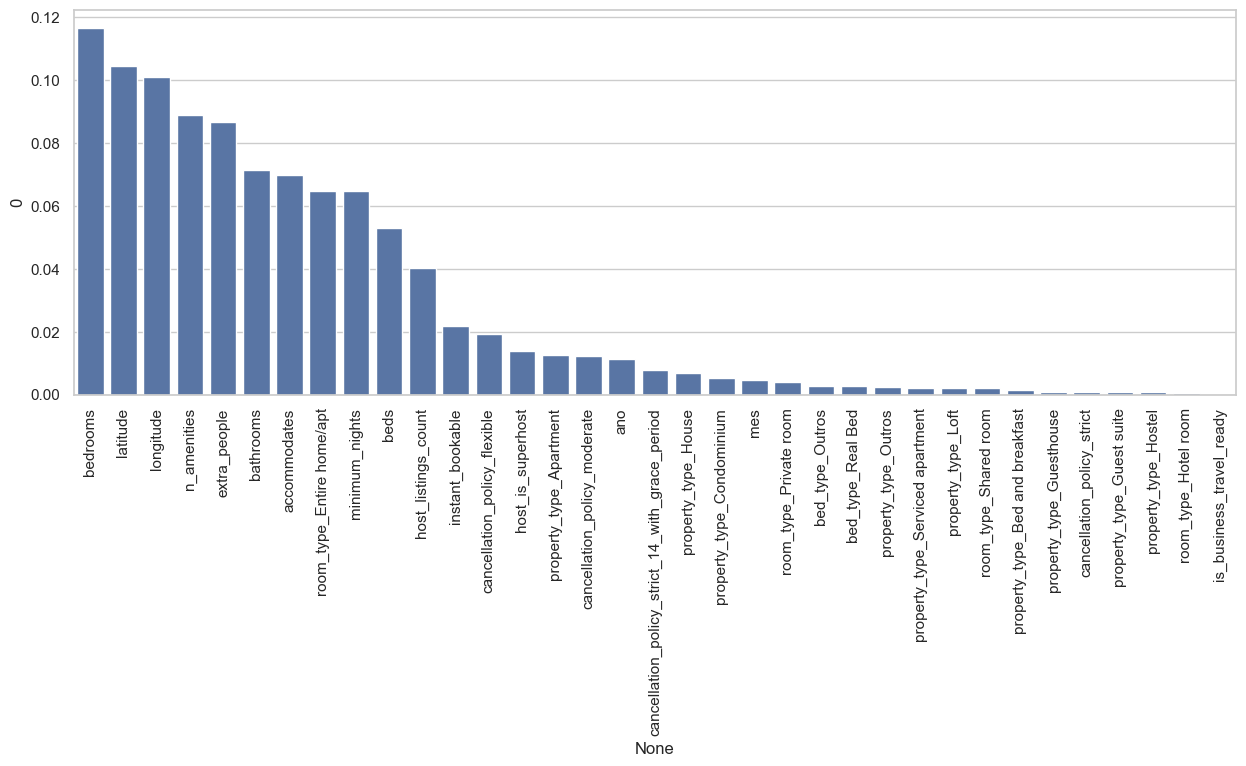

In [ ]:
importancia_features = pd.DataFrame(modelo_et.feature_importances_,X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Ajustes finais do modelo

- is_bussiness_travel_ready não parece ter muito impacto no modelo. Por conta disso, para chegar em um modelo mais simplicado irei excluir essa feature e testar sem ela

In [ ]:
print(base_airbnb_cod.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable',
       'is_business_travel_ready', 'ano', 'mes', 'n_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Outros',
       'property_type_Serviced apartment', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Outros', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


In [ ]:
if 'is_business_travel_ready' in base_airbnb_cod.columns:
    base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

# Separe a variável dependente (y) e as variáveis independentes (X)
y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

# Divida os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Treine o modelo
modelo_et.fit(X_train, y_train)

# Faça previsões
previsao = modelo_et.predict(X_test)

# Avalie o modelo
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R2: 97.50% 
RSME: 4196.31%


In [ ]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna, axis=1)
print(base_teste.colums)

y = base_teste['price']
X = base_teste.drop('price', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

## Deploy do projeto

    1 Passo -> Criar arquivo do Modelo
    2 Passo -> Escolher a forma de deploy:
                - Arquvio Executável + Tkinter
                - Deploy em um Microsite (Flask)
                - Deploy apenas para uso direto (Streamlit)
    3 Passo -> Outro arquivo Python
    4 Passo -> Importar streamlit e criar código
    5 Passo -> Atribuir ao botão o carregamento do modelo
    6 Passo -> Deploy 

In [ ]:
X['price'] = y
X.to_csv('dados.csv')

In [ ]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']